In [1]:
!unzip '/content/Diabetic_Retinopathy_Colab.zip'

Archive:  /content/Diabetic_Retinopathy_Colab.zip
   creating: Diabetic_Retinopathy_Colab/dataset/
   creating: Diabetic_Retinopathy_Colab/dataset/Testing/
   creating: Diabetic_Retinopathy_Colab/dataset/Testing/Classification/
  inflating: Diabetic_Retinopathy_Colab/dataset/Testing/Classification/Diabetic Retinopathy classification.jpg  
   creating: Diabetic_Retinopathy_Colab/dataset/Testing/Detection/
  inflating: Diabetic_Retinopathy_Colab/dataset/Testing/Detection/1-s2.0-S2666307423000050-gr3.jpg  
  inflating: Diabetic_Retinopathy_Colab/dataset/Testing/Detection/diabetic_retinopathy_detection-original-3.0.0.png  
  inflating: Diabetic_Retinopathy_Colab/dataset/Testing/Detection/download (1).jpg  
   creating: Diabetic_Retinopathy_Colab/dataset/Testing/Normal eye/
  inflating: Diabetic_Retinopathy_Colab/dataset/Testing/Normal eye/download (1).jpg  
  inflating: Diabetic_Retinopathy_Colab/dataset/Testing/Normal eye/download.jpg  
  inflating: Diabetic_Retinopathy_Colab/dataset/Test

In [2]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)

In [5]:
train = train_gen.flow_from_directory('/content/Diabetic_Retinopathy_Colab/dataset/Testing',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/Diabetic_Retinopathy_Colab/dataset/Testing',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 11 images belonging to 4 classes.
Found 11 images belonging to 4 classes.


In [6]:
train.class_indices

{'Classification': 0,
 'Detection': 1,
 'Normal Retina and Diabetic Retinopathy Retina': 2,
 'Normal eye': 3}

In [7]:
# CNN

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 376ms/step - loss: 4.9058 - accuracy: 0.2727 - val_loss: 1.7895 - val_accuracy: 0.8182
Epoch 2/10
2/2 [==============================] - 0s 277ms/step - loss: 6.3508 - accuracy: 0.5455 - val_loss: 7.6619 - val_accuracy: 0.3636
Epoch 3/10
2/2 [==============================] - 0s 207ms/step - loss: 4.0541 - accuracy: 0.5455 - val_loss: 3.1307 - val_accuracy: 0.3636
Epoch 4/10
2/2 [==============================] - 0s 243ms/step - loss: 3.0827 - accuracy: 0.3636 - val_loss: 2.7194 - val_accuracy: 0.6364
Epoch 5/10
2/2 [==============================] - 0s 215ms/step - loss: 3.5264 - accuracy: 0.3636 - val_loss: 2.5671 - val_accuracy: 0.3636
Epoch 6/10
2/2 [==============================] - 1s 320ms/step - loss: 2.2972 - accuracy: 0.4545 - val_loss: 1.2448 - val_accuracy: 0.6364
Epoch 7/10
2/2 [==============================] - 1s 320ms/step - loss: 2.3121 - accuracy: 0.4545 - val_loss: 2.2744 - val_accuracy: 0.4545
Epoch 8/10
2/2 [====

In [13]:
model.save('Updated-Xception-diabetic-retinopathy.h5')

In [14]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [15]:
img = image.load_img('/content/Diabetic_Retinopathy_Colab/dataset/Training/Classification/Diabetic Retinopathy classification.jpg',target_size=(120,120))

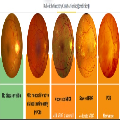

In [16]:
img

In [17]:
img = image.img_to_array(img)
img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[137., 196., 130.],
        [136., 199., 129.],
        [134., 200., 129.],
        ...,
        [244., 142.,  14.],
        [245., 142.,  14.],
        [255., 254., 255.]],

       [[143., 191., 139.],
        [140., 195., 138.],
        [140., 195., 138.],
        ...,
        [228., 145.,  39.],
        [227., 145.,  45.],
        [255., 255., 248.]],

       [[ 56.,  68.,  54.],
        [ 54.,  71.,  53.],
        [ 56.,  

In [18]:
img = np.expand_dims(img,axis=0)
img

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[137., 196., 130.],
         [136., 199., 129.],
         [134., 200., 129.],
         ...,
         [244., 142.,  14.],
         [245., 142.,  14.],
         [255., 254., 255.]],

        [[143., 191., 139.],
         [140., 195., 138.],
         [140., 195., 138.],
         ...,
         [228., 145.,  39.],
         [227., 145.,  45.],
         [255., 255., 248.]],

        [[ 56.,  68.,  54.],
       

In [19]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 96ms/step


0